# Basic GP optimizer - clean mutinormal example

**Note**: In order to use it on a specific machine, you should build machine interface (setX and get_state functions).


In [2]:

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
import pickle
import numpy as np
from modules.bayes_optimization import BayesOpt, negUCB, negExpImprove
from modules.OnlineGP import OGP
import numpy as np
import importlib
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output

saveResultsQ = False


### Creat the machine interface

In [20]:
ndim = 2 #input dimension
acquisition_delay = 0  #how long to wait between acquisitions- relevant for expriment, not for simulation

dev_ids =  [str(x+1) for x in np.arange(ndim)] #creat device ids (just numbers)
start_point = np.ones(ndim)/2 #min-max range

#creat machine interface
mi_module = importlib.import_module('machine_interfaces.machine_interface_example')
# mi_module = importlib.import_module('multinormal')
mi = mi_module.machine_interface(dev_ids = dev_ids, start_point = start_point) #an isotropic n-dimensional gaussian with amplitude=1, centered at the origin, plus gaussian background noise with std dev = 0.1

In [21]:
#check noise std
y = [mi.getState()[1][0] for x in range(100)]
np.std(y)

0.009003374556125644

In [22]:
#check the reading objective is working
mi.getState()

(array([[0.5, 0.5]]), array([[0.77360201]]))

### Create the gp

In [23]:
gp_ls = np.array(np.ones(ndim))
gp_amp = 1. 
gp_noise = 0.001

gp_precisionmat =  np.array(np.diag(1/(gp_ls**2)))
hyps = [gp_precisionmat, np.log(gp_amp), np.log(gp_noise**2)] #format the hyperparams for the OGP

gp = OGP(ndim, hyps,prmean=0)

### Create the BO

In [24]:
#create the bayesian optimizer that will use the gp as the model to optimize the machine 
opt = BayesOpt(gp, mi, acq_func="UCB", start_dev_vals = mi.x, dev_ids = dev_ids)
opt.ucb_params = np.array([2, None])

target_func =  <machine_interfaces.machine_interface_example.machine_interface object at 0x7f95f5fa45f8>
********* BO - self.mi = self.target_func wORKED!
Supposed to be grabbing initial machine state...
x_init [[0.5 0.5]]
y_init [[0.77463123]]
Using prior mean function of  0
Using prior mean parameters of  None


**Running BO**

*run the gp search for some number of steps*

In [25]:
Obj_state_s=[]

iteration = 49
current position: [[-0.05389702 -0.05389702]] current objective value: [[0.98594758]]


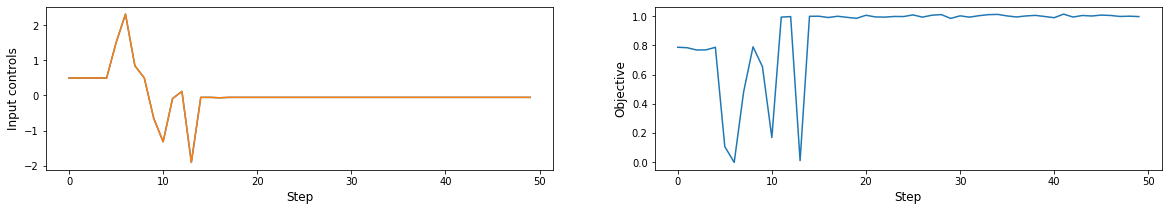

[-0.05388589 -0.05388589]
[-0.05388589 -0.05388589]
[[-0.05388589 -0.05388589]]


In [26]:
Niter = 50
for i in range(Niter):
    clear_output(wait=True) 
    print ('iteration =', i)
    print ('current position:', mi.x, 'current objective value:', mi.getState()[1])
   
    Obj_state_s.append(mi.getState()[1][0])
    
    f = plt.figure(figsize=(20,3))
    ax = f.add_subplot(121)
    ax2 = f.add_subplot(122)
    ax.set_ylabel('Input controls',fontsize=12)
    ax.set_xlabel('Step',fontsize=12)    
    ax.plot(opt.X_obs)
    ax2.set_ylabel('Objective',fontsize=12)
    ax2.set_xlabel('Step',fontsize=12)
    ax2.plot(Obj_state_s)
    plt.show(); 
    
    opt.OptIter()

In [43]:
#save results if desired
from datetime import datetime
import time
def saveResults(filename):
    timestr = datetime.now().strftime('%Y-%m-%d-%H%M%S')
    try: os.mkdir('saved_results/multinormal')
    except: pass
    results = {}
    results['start_point'] = start_point
    results['hyps'] = [gp_precisionmat,gp_amp, gp_noise]
    results['offset'] = offset
    results['xs'] = opt.X_obs
    results['ys'] = np.array([y[0][0] for y in opt.Y_obs])
    results['time'] = timestr
    np.save('saved_results/multinormal/scan_'+timestr+'_'+filename, results)
    print('saved to:  saved_results/multinormal/  scan_'+timestr+'_'+filename)

In [ ]:
saveResults('exmple1')